In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

from sklearn.tree import export_graphviz
import graphviz

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

ModuleNotFoundError: No module named 'graphviz'

In [2]:
# 다주선형 회귀분석 

df_raw = pd.read_csv("D:/data/2/체질검사.csv")
df_raw.head()

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
0,35.2,46,363.15,72.25,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4
1,11.8,27,168.00,71.25,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8
2,22.2,69,177.75,68.50,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8
3,10.6,57,147.75,65.75,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9
4,47.5,51,219.00,64.00,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4


In [3]:
#주피터 노트북 내 그래프를 바로 그리기 위한 설정
%matplotlib inline
#한글 폰트 (맑은 고딕) 적용
matplotlib.rc('font',family='Malgun Gothic')

matplotlib.rc('axes',unicode_minus=False)

In [4]:
df_raw_y = df_raw['FAT']
df_raw_x = df_raw.drop('FAT', axis = 1, inplace = False)


In [5]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y,
                                        test_size = 0.3, random_state =1234)

print('train data X size:{}'.format(df_train_x.shape))
print('train data Y size:{}'.format(df_train_y.shape))
print('test data X size:{}'.format(df_test_x.shape))
print('test data Y size:{}'.format(df_test_y.shape))

train data X size:(176, 13)
train data Y size:(176,)
test data X size:(76, 13)
test data Y size:(76,)


In [7]:
gb_uncustomized = GradientBoostingRegressor(random_state=1234)
gb_uncustomized.fit(df_train_x, df_train_y)

# Train 데이터 설명력
print('Score on training set: {:.3f}'.format(gb_uncustomized.score(df_train_x, df_train_y)))
# Test 데이터 설명력
print('Score on test set: {:.3f}'.format(gb_uncustomized.score(df_test_x, df_test_y)))

Score on training set: 0.981
Score on test set: 0.581


In [8]:
# train 및 test 설명력 결과 저장
train_score = []; test_score = [] 
# n_estimatos: 트리 수 변경: 1~100 
para_n_tree = [n_tree * 10 for n_tree in range(1, 11)] 
for v_n_estimators in para_n_tree: 
    gb = GradientBoostingRegressor(n_estimators = v_n_estimators, random_state = 1234) 
    gb.fit(df_train_x, df_train_y) 
    train_score.append(gb.score(df_train_x, df_train_y)) 
    test_score.append(gb.score(df_test_x, df_test_y)) 
# 결과 저장 
df_score_n = pd.DataFrame() 
df_score_n["n_estimators"] = para_n_tree 
df_score_n["TrainScore"] = train_score 
df_score_n["TestScore"] = test_score

In [9]:
# 모델 설명력 확인
df_score_n.round(3)

,n_estimators,TrainScore,TestScore
0,10,0.712,0.512
1,20,0.850,0.589
2,30,0.897,0.600
3,40,0.921,0.599
4,50,0.942,0.587
5,60,0.954,0.586
6,70,0.963,0.587
7,80,0.970,0.581
8,90,0.976,0.582
9,100,0.981,0.581


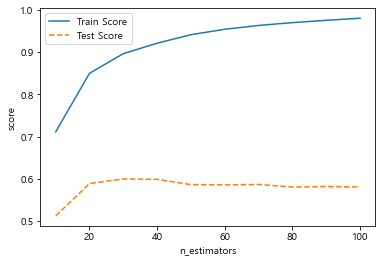

In [10]:
#모델 설명력 확인
plt.plot(para_n_tree,train_score,linestyle='-',label='Train Score')
plt.plot(para_n_tree,test_score,linestyle='--',label='Test Score')
plt.ylabel('score');
plt.xlabel('n_estimators')
plt.legend()

In [11]:
train_score = []; test_score = [] 
# min_samples_leaf: 잎사귀 최소 자료 수 
para_leaf = [n_leaf * 1 for n_leaf in range(1, 21)] 
for v_min_samples_leaf in para_leaf: 
    rf = GradientBoostingRegressor(random_state=1234, n_estimators = 100, 
            min_samples_leaf = v_min_samples_leaf) 
    rf.fit(df_train_x, df_train_y) 
    train_score.append(rf.score(df_train_x, df_train_y)) 
    test_score.append(rf.score(df_test_x, df_test_y))
# 데이터 테이블로 저장 
df_score_leaf = pd.DataFrame() 
df_score_leaf["MlinSamplesLeaf"] = para_leaf 
df_score_leaf["TrainScore"] = train_score 
df_score_leaf["TestScore"] = test_score

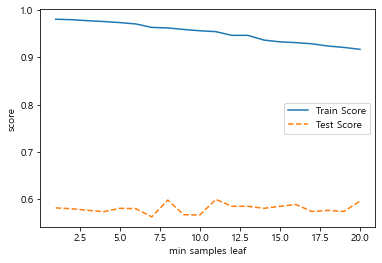

In [12]:
#모델 설명력 확인
plt.plot(para_leaf,train_score,linestyle='-',label='Train Score')
plt.plot(para_leaf,test_score,linestyle='--',label='Test Score')
plt.ylabel('score');
plt.xlabel('min samples leaf')
plt.legend()

In [13]:
# train,test 설명력 결과 저장
train_score = []; test_score = []

para_split = [n_split *2 for n_split in range( 1,21)]

for v_min_samples_split  in para_split:
    gb = GradientBoostingRegressor(random_state=1234, n_estimators = 30, min_samples_leaf=11, min_samples_split=v_min_samples_split)
    
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x,df_test_y))
    

    
df_score = pd.DataFrame()
df_score['MinSamplesSplit'] = para_split
df_score['TrainScore'] = train_score
df_score['TestScore'] = test_score 

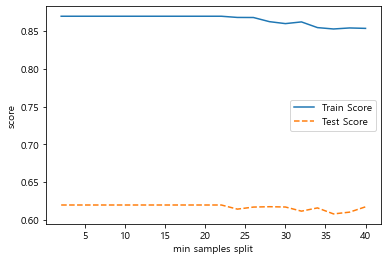

In [14]:
#모델 설명력 그래프 확인
plt.plot(para_split, train_score, linestyle='-', label='Train Score')
plt.plot(para_split, test_score, linestyle='--', label='Test Score')
plt.ylabel('score');
plt.xlabel('min samples split')
plt.legend()

In [20]:
# train,test 설명력 결과 저장
train_score = []; test_score = []

para_depth = [depth for depth in range(1,11)]

for v_max_depth  in para_depth:
    gb = GradientBoostingRegressor(random_state=1234, n_estimators = 30, min_samples_leaf=11,min_samples_split=22,
                        max_depth=v_max_depth)
    
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x,df_test_y))
    

    
df_score = pd.DataFrame()
df_score['Depth'] = para_depth
df_score['TrainScore'] = train_score
df_score['TestScore'] = test_score 

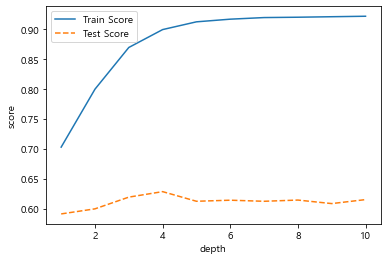

In [21]:
#모델 설명력 그래프 확인
plt.plot(para_depth, train_score, linestyle='-', label='Train Score')
plt.plot(para_depth, test_score, linestyle='--', label='Test Score')
plt.ylabel('score');
plt.xlabel('depth')
plt.legend()

In [ ]:
gb_final = GradientBoostingRegressor(random_state=1234, n_estimators = 30, min_samples_leaf = 11,
                                min_samples_split = 22, max_depth =4, learning_rate = 0.1)
gb_final.fit(df_train_x, df_train_y)

# Train 데이터 설명력
print('Score on training set: {:.3f}'.format(gb_final.score(df_train_x, df_train_y)))
# Test 데이터 설명력
print('Score on test set: {:.3f}'.format(gb_final.score(df_test_x, df_test_y)))